# Name : Anamika Srivastava Certificate code:TCRIB3R155

# Name : Aparna Singh Certificate Code : TCRIB3R154

# Name : Aditi Certificate Code : TCRIB3R156

Data Science and Machine Learning final project
Internship duration : April 2022 - June 2022

# Assignment

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed (Col -21).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\bank-full.csv" , sep=";", skipinitialspace=True)     #reading csv file and arranging the file

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.isnull().sum()      #checking null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.info()   #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
df_update=df.copy()
df_update

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 1. AGE
classifying age in 5 parts with difference of 10

In [8]:
a1=df_update[(df_update['age']>=18)&(df_update['age']<=28)]
a2=df_update[(df_update['age']>=29)&(df_update['age']<=39)]
a3=df_update[(df_update['age']>=40)&(df_update['age']<=50)]
a4=df_update[(df_update['age']>=51)&(df_update['age']<=60)]
a5=df_update[(df_update['age']>=61)]

In [9]:
total=[]
list1=[a1,a2,a3,a4,a5]
for i in list1:
    total.append(i.shape[0])
yes_count=[]
for i in list1:
    yes_count.append(i[i['y']=='yes'].count()['y'])

In [10]:
age_final=pd.DataFrame()
age_final['Age Gropus']=['18-28','29-39','40-50','51-60','61+']
age_final['Total']=total
age_final['Yes Count']=yes_count
age_final['Percentage']=(age_final['Yes Count']/age_final['Total'])*100
age_final.sort_values(by='Percentage',ascending=False)

,Age Gropus,Total,Yes Count,Percentage
4,61+,1188,502,42.255892
0,18-28,4088,757,18.517613
1,29-39,19274,2084,10.812494
3,51-60,8067,811,10.053304
2,40-50,12594,1135,9.012228


So, above arrangement shows that age groups of 61+ and 18-28 are of higher percentage while age group of 40-50 has the less percentage

# 2. Job Type

In [12]:
df_update['job'].value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [13]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df_update['job'].value_counts().index:
    df_job=pd.DataFrame()
    df_job=df_update[df_update['job']==i]
    title.append(i)
    total_count_in_each_group.append(df_job.shape[0])
    yes_count.append(df_job[df_job['y']=='yes'].count()['y'])
    no_count.append(df_job[df_job['y']=='no'].count()['y'])
df_jobs=pd.DataFrame()
df_jobs['Job Title']=title
df_jobs['Total']=total_count_in_each_group
df_jobs['Yes']=yes_count
df_jobs['No']=no_count
df_jobs

,Job Title,Total,Yes,No
0,blue-collar,9732,708,9024
1,management,9458,1301,8157
2,technician,7597,840,6757
3,admin.,5171,631,4540
4,services,4154,369,3785
5,retired,2264,516,1748
6,self-employed,1579,187,1392
7,entrepreneur,1487,123,1364
8,unemployed,1303,202,1101
9,housemaid,1240,109,1131


([<matplotlib.axis.XTick at 0x1afcccf6610>,
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

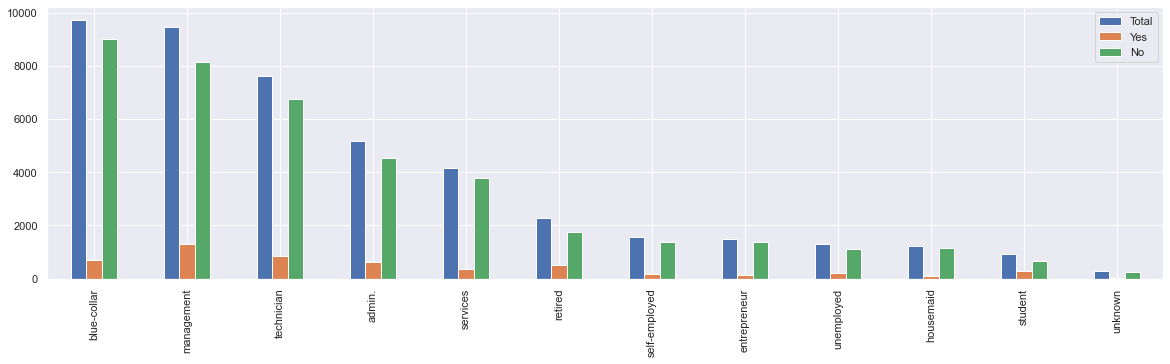

In [14]:
labels=df_jobs['Job Title']
positions=np.arange(0,12,1)
df_jobs.plot(kind='bar',figsize=(20,5))
plt.xticks(positions,labels)

In [15]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)
df_jobs_final

,Job Title,Percentage_yes,Percentage_no
10,student,28.678038,71.321962
5,retired,22.791519,77.208481
8,unemployed,15.502686,84.497314
1,management,13.755551,86.244449
3,admin.,12.202669,87.797331
6,self-employed,11.842939,88.157061
11,unknown,11.805556,88.194444
2,technician,11.056996,88.943004
4,services,8.883004,91.116996
9,housemaid,8.790323,91.209677


([<matplotlib.axis.XTick at 0x1afcd3ef970>,
 [Text(10, 0, 'student'),
  Text(5, 0, 'retired'),
  Text(8, 0, 'unemployed'),
  Text(1, 0, 'management'),
  Text(3, 0, 'admin.'),
  Text(6, 0, 'self-employed'),
  Text(11, 0, 'unknown'),
  Text(2, 0, 'technician'),
  Text(4, 0, 'services'),
  Text(9, 0, 'housemaid'),
  Text(7, 0, 'entrepreneur'),
  Text(0, 0, 'blue-collar')])

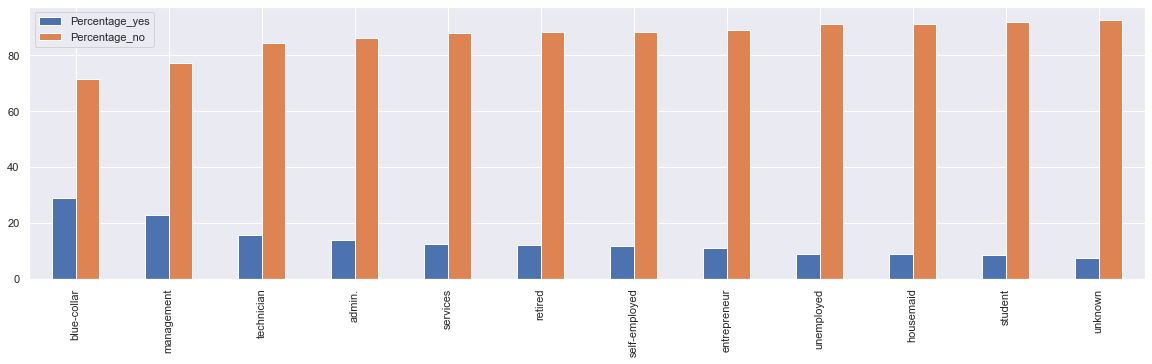

In [16]:
labels=df_jobs_final['Job Title'].tolist()
positions=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,5))
plt.xticks(positions,labels)

1)From above graph we can see that students and retired people are the clients who have high percentage of of subscription rate.

2)Blue-collar,entrepreneur,housemaid,services have low are few jobs that have low subscription rate.

3)People with job description as 'Blue-collar' are the most contacted people

4)Students are the less contacted people

5)We have 288 enteries where job is unknown.

# 3. Marital Status

In [17]:
df_married=df_update[df_update['marital']=='married']
df_single=df_update[df_update['marital']=='single']
df_divorced=df_update[df_update['marital']=='divorced']
married=df_update['marital'].value_counts().to_frame()
married

,marital
married,27214
single,12790
divorced,5207


In [18]:
yes_count=[]
yes_count.append(df_married[df_married['y']=='yes'].count()[1])
yes_count.append(df_single[df_single['y']=='yes'].count()[1])
yes_count.append(df_divorced[df_divorced['y']=='yes'].count()[1])
married['Subscription count']=yes_count

<AxesSubplot:>

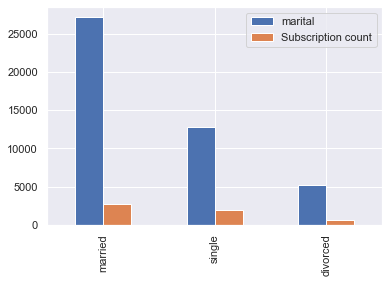

In [19]:
married.plot(kind='bar')


In [20]:
married['Percentage']=(married['Subscription count']/married['marital'])*100
married.sort_values(by='Percentage',ascending=False)

,marital,Subscription count,Percentage
single,12790,1912,14.949179
divorced,5207,622,11.945458
married,27214,2755,10.123466


Subscription counts are not very related to marital status. They don't have strong relationship.

# 4. Education

In [21]:
education=df_update['education'].value_counts().to_frame()
education

,education
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [22]:
df_secondary=df_update[df_update['education']=='secondary']
df_tertiary=df_update[df_update['education']=='tertiary']
df_primary=df_update[df_update['education']=='primary']
df_unknown=df_update[df_update['education']=='unknown']

In [23]:
yes_count=[]
yes_count.append(df_secondary[df_secondary['y']=='yes'].count()[1])
yes_count.append(df_tertiary[df_tertiary['y']=='yes'].count()[1])
yes_count.append(df_primary[df_primary['y']=='yes'].count()[1])
yes_count.append(df_unknown[df_unknown['y']=='yes'].count()[1])
education['Subscription count']=yes_count

<AxesSubplot:>

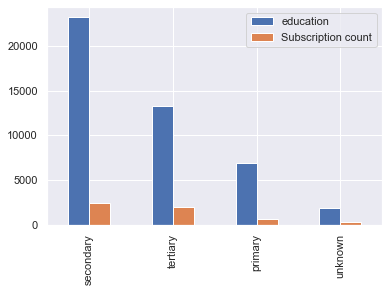

In [24]:
education.plot(kind='bar')

In [25]:
education['Percentage']=(education['Subscription count']/education['education'])*100
education.sort_values(by='Percentage',ascending=False)

,education,Subscription count,Percentage
tertiary,13301,1996,15.006390
unknown,1857,252,13.570275
secondary,23202,2450,10.559435
primary,6851,591,8.626478


We have most of the secondary education entries followed by the tertiary but the subscription count for tertiary education is most of all in terms of percentage

# 5. Credit in default

Text(0.5, 1.0, 'Loan Distribution')

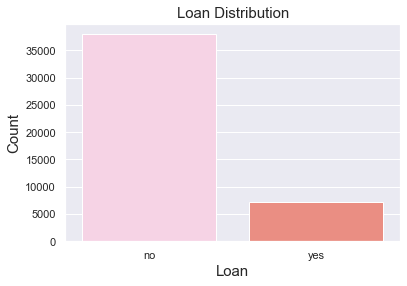

In [29]:
sns.countplot(x = 'loan',data = df,palette="Set3_r")
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

In [30]:
yes=default_yes[default_yes['y']=='yes'].count()['y']
no=default_yes[default_yes['y']=='no'].count()['y']
total=default_yes.count()['y']
print("Default")
print(total)
print((yes/total)*100)
print((no/total)*100)

Default
815
6.38036809815951
93.61963190184049


In [31]:
yes=default_no[default_no['y']=='yes'].count()['y']
no=default_no[default_no['y']=='no'].count()['y']
total=default_no.count()['y']
print("Non default")
print(total)
print((yes/total)*100)
print((no/total)*100)

Non default
44396
11.796107757455626
88.20389224254437


11% of the non defaulters have opted for term deposit loan

# 6.Contact

Text(0.5, 1.0, 'Contact Distribution')

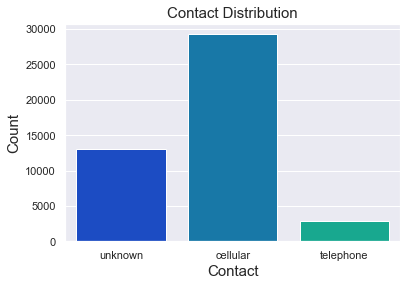

In [37]:
sns.countplot(x = 'contact',data = df,palette="winter")
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

In [40]:
print('Contact:\n Unknown Contact:'     , df[df['contact'] == 'unknown']     ['age'].count(),
              '\n Cellular Contact:'   , df[df['contact'] == 'cellular']    ['age'].count(),
              '\n Telephone Contact:'  , df[df['contact'] == 'telephone']   ['age'].count())

Contact:
 Unknown Contact: 13020 
 Cellular Contact: 29285 
 Telephone Contact: 2906


# 7.Month


Text(0.5, 1.0, 'Monthly Distribution')

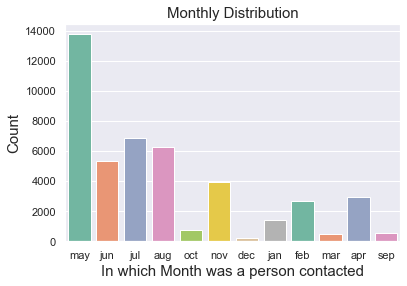

In [42]:
sns.countplot(x = 'month',data = df,palette="Set2")
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

# 8. Day

<AxesSubplot:xlabel='day'>

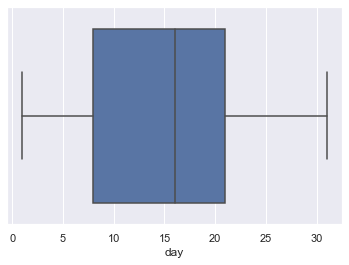

In [44]:
sns.boxplot(x=df["day"])

# 9. Duration of call

<AxesSubplot:xlabel='duration'>

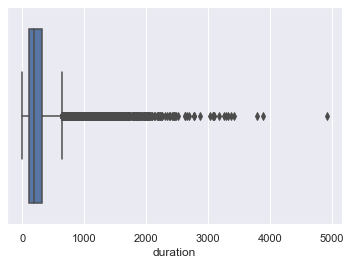

In [46]:
sns.boxplot(x=df["duration"])

C:\Users\Dell\AppData\Local\Temp\ipykernel_13064\3719498377.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


Text(0.5, 1.0, 'Duration distribution')

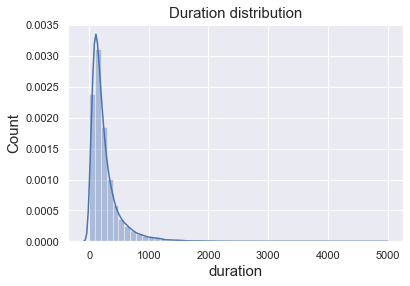

In [48]:
sns.distplot(df['duration'])
plt.xlabel("duration", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Duration distribution', fontsize=15)

# 10. Campaign

Text(0.5, 1.0, 'Campaign Distribution')

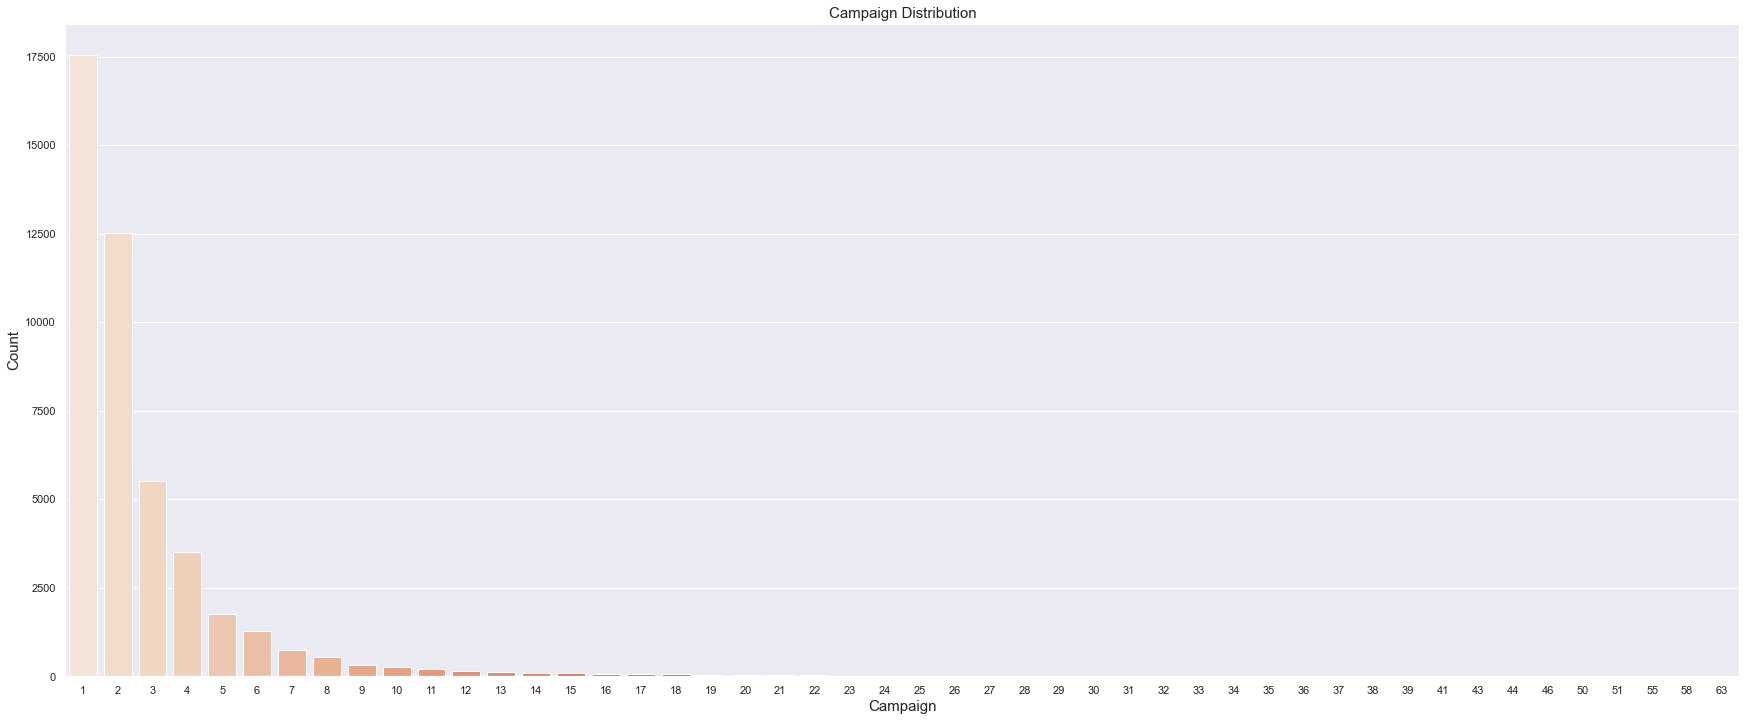

In [51]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'campaign', data = df,palette="rocket_r")
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

In [56]:
total=[]
no=[]
yes=[]

total.append(df_update[(df_update['duration']<=500)].count()['duration'])
no.append(df_update[(df_update['duration']<=500) & (df_update['y']=='no')].count()['y'])
yes.append(df_update[(df_update['duration']<=500) & (df_update['y']=='yes')].count()['y'])


total.append(df_update[(df_update['duration']<=1000) & (df_update['duration']>500)].count()['duration'])
no.append(df_update[(df_update['duration']<=1000) & (df_update['duration']>500) & (df_update['y']=='no')].count()['y'])
yes.append(df_update[(df_update['duration']<=1000) & (df_update['duration']>500) & (df_update['y']=='yes')].count()['y'])

total.append(df_update[(df_update['duration']<=1500) & (df_update['duration']>1000)].count()['duration'])
no.append(df_update[(df_update['duration']<=1500) & (df_update['duration']>1000) & (df_update['y']=='no')].count()['y'])
yes.append(df_update[(df_update['duration']<=1500) & (df_update['duration']>1000) & (df_update['y']=='yes')].count()['y'])

total.append(df_update[(df_update['duration']<=2000) & (df_update['duration']>1500)].count()['duration'])
no.append(df_update[(df_update['duration']<=2000) & (df_update['duration']>1500) & (df_update['y']=='no')].count()['y'])
yes.append(df_update[(df_update['duration']<=2000) & (df_update['duration']>1500) & (df_update['y']=='yes')].count()['y'])

total.append(df_update[(df_update['duration']>2000)].count()['duration'])
no.append(df_update[(df_update['duration']>2000) & (df_update['y']=='no')].count()['y'])
yes.append(df_update[(df_update['duration']>2000) & (df_update['y']=='yes')].count()['y'])


duration=pd.DataFrame()
duration['Duration']=['Till 500','501-1000','1001-1500','1501-2000','2001+']
duration['total']=total
duration['Yes']=yes
duration['No']=no
duration['Yes percent']=(duration['Yes']/duration['total'])*100
duration.sort_values('Yes percent',ascending=False)

,Duration,total,Yes,No,Yes percent
3,1501-2000,168,108,60,64.285714
2,1001-1500,831,494,337,59.446450
4,2001+,59,30,29,50.847458
1,501-1000,4313,1645,2668,38.140505
0,Till 500,39840,3012,36828,7.560241


Text(0.5, 1.0, 'Poutcome distribution')

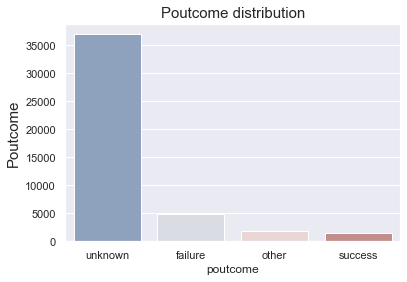

In [59]:
sns.countplot(x = 'poutcome', data = df, orient = 'v',palette="vlag")
plt.ylabel("Poutcome", fontsize=15)
plt.title('Poutcome distribution', fontsize=15)

# K-Nearest Neighbour (KNN) Classification

In [61]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 441.2 kB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 kB 865.1 kB/s eta 0:00:00
     -------------------------------------- 38.6/38.6 MB 668.0 kB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=b555f178588e5706db98150cb9d8e35de026a5640e73c1133d40c2c790d5247f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} KNN Score: {:.2f}%".format(max, knn.score(x_test.T, y_test.T)*100))

NameError: name 'x_train' is not defined

<built-in function max> KNN Score: 89.15%

# Random Forest Classification

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 89.58%

We got max test score using Random Forest Classification